In [ ]:
%matplotlib inline

import pandas as pd

import numpy  as np
from matplotlib import pyplot as plt

In [157]:
Vacancies = pd.read_csv("Socialhousingvacancy_2016.csv",usecols = ["LGA", "Bedrooms", "TotalVAC"])
Vacancies.head()

,Bedrooms,TotalVAC,LGA
0,1,30,SUNSHINE COAST
1,2,30,SUNSHINE COAST
2,3,19,MORETON BAY
3,3,22,REDLAND
4,3,22,REDLAND


In [159]:
vacantdays = Vacancies[["LGA", "TotalVAC"]].groupby(Vacancies["LGA"].str.title()).sum()
vacantdays.head()

,TotalVAC
LGA,
Balonne,1128
Banana,489
Barcaldine,97
Boulia,221
Brisbane,44370


In [162]:
onebdrvacantdays = Vacancies[Vacancies["Bedrooms"]==1][["LGA", "TotalVAC"]].groupby(Vacancies["LGA"].str.title()).sum()
onebdrvacantdays.rename(columns = {"TotalVAC" : "1bdrvacant"}, inplace = True)
onebdrvacantdays.head()

,1bdrvacant
LGA,
Banana,59
Brisbane,18356
Bundaberg,1571
Burdekin,651
Cairns,7109


In [163]:
twobdrvacantdays = Vacancies[Vacancies["Bedrooms"]==2][["LGA", "TotalVAC"]].groupby(Vacancies["LGA"].str.title()).sum()
twobdrvacantdays.rename(columns = {"TotalVAC" : "2bdrvacant"}, inplace = True)
twobdrvacantdays.head()

,2bdrvacant
LGA,
Balonne,436
Banana,47
Barcaldine,64
Boulia,51
Brisbane,13126


In [164]:
threebdrvacantdays = Vacancies[Vacancies["Bedrooms"]==3][["LGA", "TotalVAC"]].groupby(Vacancies["LGA"].str.title()).sum()
threebdrvacantdays.rename(columns = {"TotalVAC" : "3bdrvacant"}, inplace = True)
threebdrvacantdays.head()

,3bdrvacant
LGA,
Balonne,692
Banana,383
Barcaldine,33
Boulia,170
Brisbane,10474


In [165]:
fourbdrvacantdays = Vacancies[Vacancies["Bedrooms"]>3][["LGA", "TotalVAC"]].groupby(Vacancies["LGA"].str.title()).sum()
fourbdrvacantdays.rename(columns = {"TotalVAC" : "4+bdrvacant"}, inplace = True)
fourbdrvacantdays.head()

,4+bdrvacant
LGA,
Brisbane,2414
Bundaberg,256
Burdekin,227
Cairns,1416
Cassowary Coast,56


In [167]:
vctypes = pd.concat([vacantdays,onebdrvacantdays, twobdrvacantdays, threebdrvacantdays, fourbdrvacantdays], axis = 1)
vctypes = vctypes.fillna(0)
vctypes.head()

,TotalVAC,1bdrvacant,2bdrvacant,3bdrvacant,4+bdrvacant
Balonne,1128,0.0,436.0,692.0,0.0
Banana,489,59.0,47.0,383.0,0.0
Barcaldine,97,0.0,64.0,33.0,0.0
Boulia,221,0.0,51.0,170.0,0.0
Brisbane,44370,18356.0,13126.0,10474.0,2414.0


In [135]:
Tenancies = pd.read_csv("Socialhousingtenancies_2016.csv", usecols = ["LGA", "NumberBedrooms", "MarketRent", "Occupancy"])
Tenancies["MarketRent"] = Tenancies["MarketRent"].replace("\$","",regex = True).astype(float)

In [136]:
Tenancies.head()

,NumberBedrooms,MarketRent,Occupancy,LGA
0,3,255.0,Under-occupied,Ipswich
1,3,375.0,Under-occupied,Brisbane
2,3,370.0,Not overcrowded or under-occupied,Brisbane
3,3,375.0,Under-occupied,Brisbane
4,4,420.0,Under-occupied,Brisbane


In [173]:
Properties = Tenancies[["LGA", "NumberBedrooms"]].groupby("LGA").count()
Properties.rename(columns = {"NumberBedrooms" : "Properties"}, inplace = True)



In [174]:
Properties.head(10)

,Properties
LGA,
Balonne,91
Banana,227
Barcaldine,19
Barcoo,5
Blackall Tambo,11
Boulia,22
Brisbane,15531
Bundaberg,995
Burdekin,154


In [175]:
onebdr = Tenancies[Tenancies["NumberBedrooms"]==1][["LGA", "NumberBedrooms"]].groupby("LGA").count()
onebdr.rename(columns = {"NumberBedrooms" : "# of 1bdrs"}, inplace = True)
onebdr.head()


,# of 1bdrs
LGA,
Balonne,3
Banana,9
Barcaldine,4
Brisbane,5475
Bundaberg,234


In [176]:
twobdr = Tenancies[Tenancies["NumberBedrooms"]==2][["LGA", "NumberBedrooms"]].groupby("LGA").count()
twobdr.rename(columns = {"NumberBedrooms" : "# of 2bdrs"}, inplace = True)
twobdr.head()


,# of 2bdrs
LGA,
Balonne,27
Banana,30
Barcaldine,3
Barcoo,3
Blackall Tambo,5


In [177]:
Threebdr = Tenancies[Tenancies["NumberBedrooms"]==3][["LGA", "NumberBedrooms"]].groupby("LGA").count()
Threebdr.rename(columns = {"NumberBedrooms" : "# of 3bdrs"}, inplace = True)
Threebdr.head()

,# of 3bdrs
LGA,
Balonne,59
Banana,181
Barcaldine,12
Barcoo,1
Blackall Tambo,6


In [178]:
Fourbdr = Tenancies[Tenancies["NumberBedrooms"]>3][["LGA", "NumberBedrooms"]].groupby("LGA").count()
Fourbdr.rename(columns = {"NumberBedrooms" : "# of 4+bdrs"}, inplace = True)
Fourbdr.head()

,# of 4+bdrs
LGA,
Balonne,2
Banana,7
Barcoo,1
Boulia,1
Brisbane,785


In [179]:
bdtypes = pd.concat([Properties, onebdr, twobdr, Threebdr, Fourbdr], axis = 1)
bdtypes = bdtypes.fillna(0)
bdtypes.head()


,Properties,# of 1bdrs,# of 2bdrs,# of 3bdrs,# of 4+bdrs
Balonne,91,3.0,27,59,2.0
Banana,227,9.0,30,181,7.0
Barcaldine,19,4.0,3,12,0.0
Barcoo,5,0.0,3,1,1.0
Blackall Tambo,11,0.0,5,6,0.0


In [200]:
vcbyproperties = pd.concat([vctypes, bdtypes], axis = 1)
vcbyproperties.head()

,TotalVAC,1bdrvacant,2bdrvacant,3bdrvacant,4+bdrvacant,Properties,# of 1bdrs,# of 2bdrs,# of 3bdrs,# of 4+bdrs
Balonne,1128.0,0.0,436.0,692.0,0.0,91.0,3.0,27.0,59.0,2.0
Banana,489.0,59.0,47.0,383.0,0.0,227.0,9.0,30.0,181.0,7.0
Barcaldine,97.0,0.0,64.0,33.0,0.0,19.0,4.0,3.0,12.0,0.0
Barcoo,NaN,NaN,NaN,NaN,NaN,5.0,0.0,3.0,1.0,1.0
Blackall Tambo,NaN,NaN,NaN,NaN,NaN,11.0,0.0,5.0,6.0,0.0


In [207]:
vcbyproperties['avg vacancy'] = vctypes['TotalVAC']/bdtypes['Properties']
vcbyproperties['avg 1bdr vacancy'] = vctypes['1bdrvacant']/bdtypes['# of 1bdrs']
vcbyproperties['avg 2bdr vacancy'] = vctypes['2bdrvacant']/bdtypes['# of 2bdrs']
vcbyproperties['avg 3bdr vacancy'] = vctypes['3bdrvacant']/bdtypes['# of 3bdrs']
vcbyproperties['avg 4+bdr vacancy'] = vctypes['4+bdrvacant']/bdtypes['# of 4+bdrs']



In [209]:
avgvacantdays = vcbyproperties[['avg vacancy','avg 1bdr vacancy','avg 2bdr vacancy','avg 3bdr vacancy','avg 4+bdr vacancy']]
avgvacantdays

,avg vacancy,avg 1bdr vacancy,avg 2bdr vacancy,avg 3bdr vacancy,avg 4+bdr vacancy
Balonne,12.395604,0.000000,16.148148,11.728814,0.000000
Banana,2.154185,6.555556,1.566667,2.116022,0.000000
Barcaldine,5.105263,0.000000,21.333333,2.750000,NaN
Barcoo,NaN,NaN,NaN,NaN,NaN
Blackall Tambo,NaN,NaN,NaN,NaN,NaN
Boulia,10.045455,NaN,6.375000,13.076923,0.000000
Brisbane,2.856867,3.352694,2.937122,2.181175,3.075159
Bundaberg,4.373869,6.713675,4.733564,3.213889,2.285714
Burdekin,10.545455,34.263158,9.969697,5.085366,11.350000
Burke,NaN,NaN,NaN,NaN,NaN


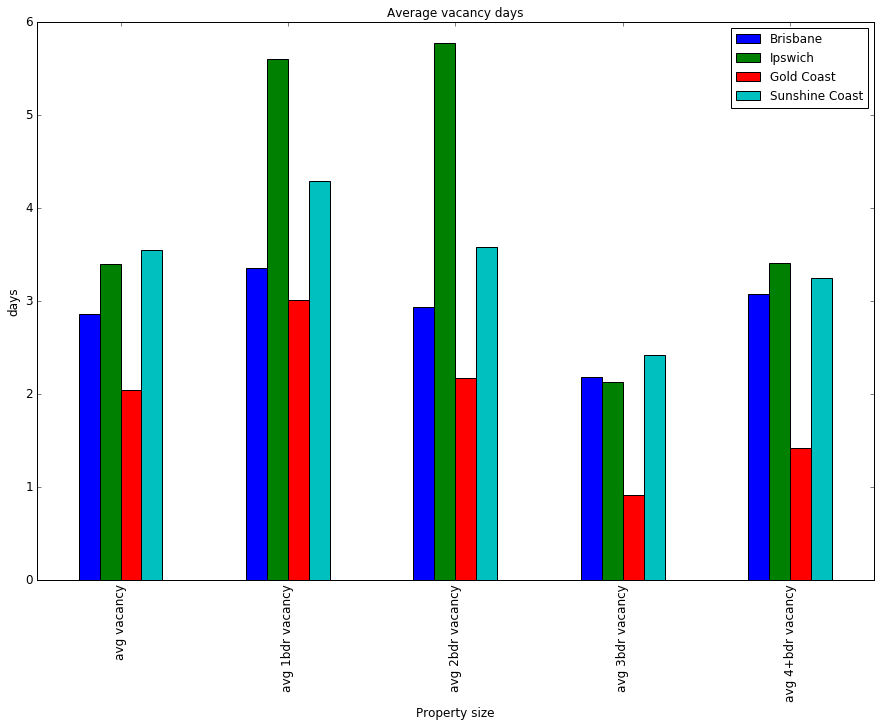

In [274]:
ax = avgvacantdays.ix[["Brisbane", "Ipswich", "Gold Coast", "Sunshine Coast"]].T.plot(kind='bar', title ="Average vacancy days", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Property size", fontsize=12)
ax.set_ylabel("days", fontsize=12)
plt.savefig('q3.png')